In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer , MaxAbsScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB , GaussianNB , MultinomialNB
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score , classification_report
from sklearn.preprocessing import Binarizer

## Reading the Data

In [15]:
data = pd.read_csv("data.csv")

In [16]:
data.columns

Index(['Unnamed: 0', 'name', 'brand', '2G', '3G', '4G', '5G', 'Announced',
       'Status', 'Weight', 'Length', 'Width', 'Diameter', 'SIM',
       'Display Type', 'Display Size', 'ppi', 'body ratio', 'OS',
       'battery_capacity', 'Price', 'CPU', 'ratio', 'pixel', 'WLAN', 'Colors',
       'Sensors', 'Bluetooth', 'GPU', 'Loudspeaker', '3.5mm jack', 'Chipset',
       'Network', 'Internal', 'Card slot', 'RAM', 'Storage'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2651 non-null   int64  
 1   name              2651 non-null   object 
 2   brand             2651 non-null   object 
 3   2G                2651 non-null   bool   
 4   3G                2651 non-null   bool   
 5   4G                2651 non-null   bool   
 6   5G                2651 non-null   bool   
 7   Announced         2651 non-null   float64
 8   Status            2651 non-null   object 
 9   Weight            2651 non-null   float64
 10  Length            2651 non-null   object 
 11  Width             2651 non-null   object 
 12  Diameter          2651 non-null   object 
 13  SIM               2651 non-null   object 
 14  Display Type      2651 non-null   object 
 15  Display Size      2651 non-null   float64
 16  ppi               2651 non-null   float64


## Data Exploration and Pre-proccessing

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
ابتدا اسامی سیستم‌عامل‌ها را از ستون مربوطه استخراج کرده‌ایم
</font>
</p>

In [18]:
data['OS'].value_counts()

Android 10       251
Android 9.0      188
Android 11       185
Android 4.4.2    175
Android 12       124
                ... 
Android 2.4        1
KaiOS 3.0          1
Mobile 6.5.3       1
HarmonyOS 3.1      1
Android 2.2.2      1
Name: OS, Length: 119, dtype: int64

In [19]:
data['OS'] = data['OS'].str.split().str[0]

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=4 color=blue> 
برخی از اسامی در فرآیند استخراج به درستی سیستم‌عامل را نشان نمی‌دهند. با چک کردن مواردی از این دست و تطابق با داده‌های روی وبسایت این اسامی را تصحیح می‌کنیم:
</font>
</p>

In [20]:
data.loc[data['OS']=='Phone', 'OS'] = 'Windows'
data.loc[data['OS']=='Mobile', 'OS'] = 'Windows'
data.loc[data['OS']=='platform', 'OS'] = 'Nokia'
data.loc[74, 'OS'] = 'Firefox'
data.loc[75, 'OS'] = 'Firefox'
data.loc[93, 'OS'] = 'Firefox'
data.loc[1807, 'OS'] = 'Firefox'
data.loc[2598, 'OS'] = 'Android'

In [21]:
data['OS'].value_counts()

Android      2450
Windows        66
iOS            60
HarmonyOS      21
Symbian        10
Belle           8
KaiOS           6
Firefox         5
iPadOS          5
EMUI            5
Nokia           5
Anna            3
Tizen           3
FP1             2
MeeGo           1
Linux           1
Name: OS, dtype: int64

In [22]:
os_mapping = {
    'MeeGo': 'Other',
    'Windows':'Windows',
    'Firefox': 'Other',
    'Linux': 'Other',
    'FP1': 'Other',
    'Tizen': 'Other',
    'Anna': 'Other',
    'HarmonyOS': 'Other',
    'Android': 'Android',
    'iOS': 'iOS',
    'Symbian': 'Other',
    'Belle': 'Other',
    'KaiOS': 'Other',
    'iPadOS': 'iOS',
    'EMUI': 'Other',
    'Nokia':'Other'
    
}
data['OS'] = data['OS'].map(os_mapping)

In [23]:
data['OS'].groupby(data['OS']).count()

OS
Android    2450
Other        70
Windows      66
iOS          65
Name: OS, dtype: int64

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
در مرحله بعدی سایر ستون‌ها را پیش‌پردازش کرده و انکود کرده‌ایم:
</font>
</p>

In [24]:
data['Chipset'] = data['Chipset'].replace('5', np.nan)
data['Chipset'].fillna('Unknown', inplace=True)
def categorize_chipset(chipset):
    chipset = chipset.lower()
    if 'snapdragon' in chipset or 'qualcomm' in chipset:
        return 'Qualcomm'
    elif 'mediatek' in chipset or 'mt' in chipset:
        return 'MediaTek'
    elif 'apple' in chipset:
        return 'Apple'
    elif 'exynos' in chipset:
        return 'Samsung Exynos'
    elif 'intel' in chipset:
        return 'Intel'
    elif 'nvidia' in chipset:
        return 'Nvidia'
    else:
        return 'Other'
data['Chipset Manufacturer'] = data['Chipset'].apply(categorize_chipset)
data.drop('Chipset', axis=1, inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2651 non-null   int64  
 1   name                  2651 non-null   object 
 2   brand                 2651 non-null   object 
 3   2G                    2651 non-null   bool   
 4   3G                    2651 non-null   bool   
 5   4G                    2651 non-null   bool   
 6   5G                    2651 non-null   bool   
 7   Announced             2651 non-null   float64
 8   Status                2651 non-null   object 
 9   Weight                2651 non-null   float64
 10  Length                2651 non-null   object 
 11  Width                 2651 non-null   object 
 12  Diameter              2651 non-null   object 
 13  SIM                   2651 non-null   object 
 14  Display Type          2651 non-null   object 
 15  Display Size         

In [26]:
data['Audio_Features'] = (data['Loudspeaker'] & data['3.5mm jack']) * 2 + (data['Loudspeaker'] ^ data['3.5mm jack'])

data.drop(['Loudspeaker', '3.5mm jack'], axis=1, inplace=True)

In [27]:
data = data.drop(['Bluetooth','Colors','WLAN','Card slot','Network','Internal','ratio'], axis=1)

In [28]:
data['Length'] = data['Length'].str.extract('(\d+\.?\d*)').astype(float)

In [29]:
data['Width']=data['Width'].str.extract('(\d+\.?\d*)').astype(float)

In [30]:
def convert_to_average(diameter_str):

    if '-' in diameter_str:
        lower, upper = diameter_str.split('-')
        average = (float(lower) + float(upper)) / 2
        return average
    else:
        return float(diameter_str)

data['Diameter'] = data['Diameter'].str.split().str[0].apply(convert_to_average)

In [31]:
data['Display Type'].value_counts()

IPS LCD                                       1044
TFT                                            240
Super AMOLED                                   209
TFT, 256K colors                                92
AMOLED                                          58
                                              ... 
IPS LCD, 1B colors, 120Hz                        1
AMOLED, 1B colors, 120Hz, 1300 nits (peak)       1
AMOLED, 770 nits (HBM)                           1
AMOLED, 1B colors, 144Hz, 1000 nits (peak)       1
Super Clear LCD                                  1
Name: Display Type, Length: 317, dtype: int64

In [32]:
def categorize_display_type(display_type):
    display_type = display_type.lower()
    if 'retina' in display_type:
        return 'Retina'
    elif 'oled' in display_type or 'amoled' in display_type:
        return 'OLED'
    elif 'lcd' in display_type or 'tft' in display_type or 'ips' in display_type:
        return 'LCD'
   
    else:
        return 'Other'


data['Display Type'] = data['Display Type'].apply(categorize_display_type)

data['Display Type'].value_counts()

LCD       1952
OLED       661
Retina      32
Other        6
Name: Display Type, dtype: int64

In [33]:
sensors_of_interest = ['accelerometer', 'gyro', 'proximity', 'barometer', 'fingerprint']

for sensor in sensors_of_interest:
    data[f'sensor_{sensor}'] = 0
def update_sensor_flags(row):
    sensor_data = str(row['Sensors']).lower() 
    for sensor in sensors_of_interest:
        if sensor in sensor_data:
            row[f'sensor_{sensor}'] = 1
    return row

data = data.apply(update_sensor_flags, axis=1)
data = data.drop('Sensors', axis=1)

In [34]:
most_frequent_cpu_by_year = data.groupby('Announced')['CPU'].agg(lambda x: pd.Series.mode(x)[0])

for year, cpu in most_frequent_cpu_by_year.items():
    data.loc[(data['Announced'] == year) & (data['CPU'].isnull()), 'CPU'] = cpu


In [35]:
bool_columns = data.select_dtypes(include=['bool']).columns
data[bool_columns] = data[bool_columns].astype(int)

## Encoding

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
در این مرحله ستون‌هایی که ماهیت ترتیبی ندارند را وان‌هات و ستون‌هایی که ماهیت ترتیبی دارند به صورت عددی انکود کرده‌ایم.
</font>
</p>

In [36]:
columns_to_encode = ['brand', 'SIM', 'Display Type','Chipset Manufacturer']
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[columns_to_encode]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
data = pd.concat([data.drop(columns=columns_to_encode), encoded_df], axis=1)

In [37]:
columns_to_encode = ['Audio_Features','Announced', 'Status', 'CPU','RAM','Storage','GPU']
for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Checking Relationshios

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
در این مرحله ابتدا روابط بین متغیرهای مستقل را بررسی می‌کنیم تا درباره اثر آنها بر متغیر وابسته و هم‌خطی میان خود متغیرهای مستقل اطلاعاتی بدست بیاوریم:
</font>
</p>

In [39]:
corr_matrix=data[['Announced', 'Weight', 'Length',
                   'Width', 'Diameter', 'Display Size', 'ppi', 
                   'body ratio','battery_capacity','CPU', 
                    'pixel', 'GPU', 'RAM', 'Storage','Price']].corr()
corr_matrix


,Announced,Weight,Length,Width,Diameter,Display Size,ppi,body ratio,battery_capacity,CPU,pixel,GPU,RAM,Storage,Price
Announced,1.000000,0.216229,0.403826,0.148538,-0.441960,0.538291,0.408832,0.826368,0.631270,0.787164,0.542012,0.049629,0.712494,0.652005,0.266497
Weight,0.216229,1.000000,0.929611,0.959540,-0.238511,0.888796,-0.127769,0.252390,0.761959,0.196692,0.376697,0.065961,0.259722,0.263799,0.320519
Length,0.403826,0.929611,1.000000,0.920098,-0.475163,0.971983,0.027790,0.462303,0.842882,0.413990,0.501589,0.063939,0.462824,0.440941,0.335055
Width,0.148538,0.959540,0.920098,1.000000,-0.327851,0.875054,-0.171898,0.194324,0.710308,0.162053,0.334786,0.068565,0.225060,0.227280,0.262193
Diameter,-0.441960,-0.238511,-0.475163,-0.327851,1.000000,-0.534775,-0.439195,-0.618587,-0.461574,-0.582662,-0.528710,0.006734,-0.640077,-0.590590,-0.278776
Display Size,0.538291,0.888796,0.971983,0.875054,-0.534775,1.000000,0.129369,0.623587,0.895648,0.520124,0.589154,0.052241,0.574081,0.538066,0.397758
ppi,0.408832,-0.127769,0.027790,-0.171898,-0.439195,0.129369,1.000000,0.583282,0.223173,0.582161,0.814707,-0.162339,0.637162,0.559948,0.456231
body ratio,0.826368,0.252390,0.462303,0.194324,-0.618587,0.623587,0.583282,1.000000,0.664450,0.794793,0.684587,-0.017696,0.845820,0.767288,0.425506
battery_capacity,0.631270,0.761959,0.842882,0.710308,-0.461574,0.895648,0.223173,0.664450,1.000000,0.587602,0.610992,0.026532,0.605622,0.554215,0.392868
CPU,0.787164,0.196692,0.413990,0.162053,-0.582662,0.520124,0.582161,0.794793,0.587602,1.000000,0.641650,-0.008518,0.763549,0.667369,0.316382


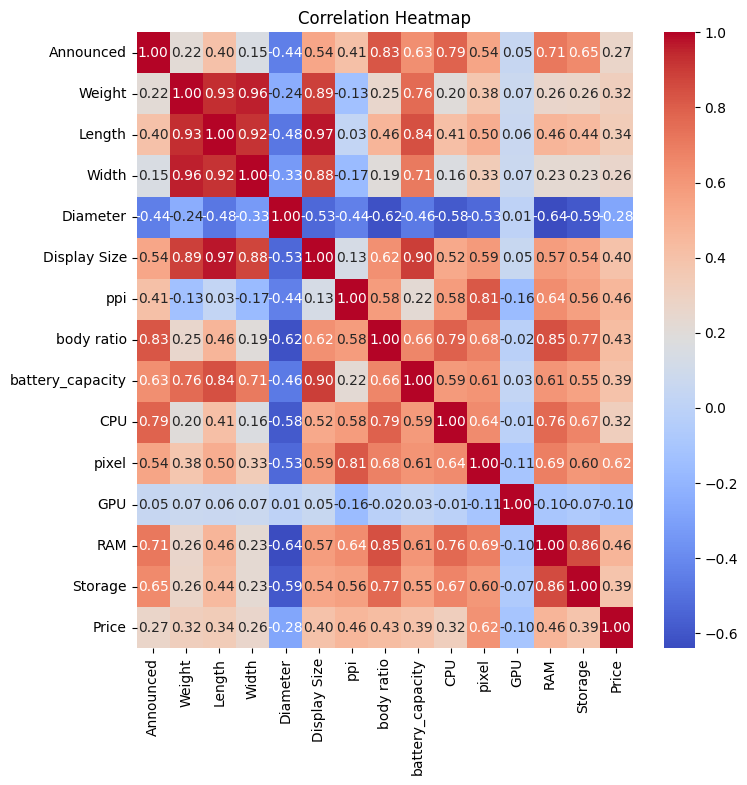

In [40]:
plt.figure(figsize=(8, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")


plt.title('Correlation Heatmap')
plt.show()

In [41]:
high_corr_pairs = []
for i, col1 in enumerate(corr_matrix.columns):
    for j, col2 in enumerate(corr_matrix.columns):
        if i < j and abs(corr_matrix.loc[col1, col2]) > 0.7:
            high_corr_pairs.append((col1, col2))

high_corr_df = pd.DataFrame(columns=['Column 1', 'Column 2', 'Correlation'])
for col1, col2 in high_corr_pairs:
    high_corr_df = high_corr_df.append({'Column 1': col1, 'Column 2': col2, 'Correlation': corr_matrix.loc[col1, col2]}, ignore_index=True)

print("Unique pairs of columns with correlation greater than 0.7:")
high_corr_df

Unique pairs of columns with correlation greater than 0.7:


,Column 1,Column 2,Correlation
0,Announced,body ratio,0.826368
1,Announced,CPU,0.787164
2,Announced,RAM,0.712494
3,Weight,Length,0.929611
4,Weight,Width,0.959540
5,Weight,Display Size,0.888796
6,Weight,battery_capacity,0.761959
7,Length,Width,0.920098
8,Length,Display Size,0.971983
9,Length,battery_capacity,0.842882


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
بررسی همبستگی میان متغیرهای فاصله‌ای نشان می‌دهد تعدادی از متغیرها همبستگی بسیار بالایی با یکدیگر دارند. جدول بالا ستون‌های با همبستگی بالاتر از ۰.۷ را می‌توانیم مشاهده کنیم.  
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
 این جدول نشان می‌دهد ستون‌های مربوط به ابعاد گوشی همبستگی بسیار بالایی با یکدیگر دارند. بنابراین می‌توانیم برخی از این متغیرهای مستقل را حذف کنیم. 
</font>
</p>


In [42]:
data=data.drop(['Unnamed: 0', 'name','Weight','Length','Width','pixel','RAM','Display Size','body ratio'],axis=1)

In [43]:
data.columns

Index(['2G', '3G', '4G', '5G', 'Announced', 'Status', 'Diameter', 'ppi', 'OS',
       'battery_capacity', 'Price', 'CPU', 'GPU', 'Storage', 'Audio_Features',
       'sensor_accelerometer', 'sensor_gyro', 'sensor_proximity',
       'sensor_barometer', 'sensor_fingerprint', 'brand_alcatel',
       'brand_apple', 'brand_asus', 'brand_blu', 'brand_htc', 'brand_huawei',
       'brand_infinix', 'brand_lenovo', 'brand_lg', 'brand_nokia',
       'brand_samsung', 'brand_sony', 'brand_xiaomi', 'brand_zte',
       'SIM_Micro-SIM', 'SIM_Mini-SIM', 'SIM_Nano-SIM', 'SIM_eSIM',
       'Display Type_LCD', 'Display Type_OLED', 'Display Type_Other',
       'Display Type_Retina', 'Chipset Manufacturer_Apple',
       'Chipset Manufacturer_Intel', 'Chipset Manufacturer_MediaTek',
       'Chipset Manufacturer_Nvidia', 'Chipset Manufacturer_Other',
       'Chipset Manufacturer_Qualcomm', 'Chipset Manufacturer_Samsung Exynos'],
      dtype='object')

In [97]:
X=data.drop(['OS'],axis=1)
y = data['OS']

In [84]:
y.value_counts()

Android    2450
Other        70
Windows      66
iOS          65
Name: OS, dtype: int64

## Building a class for model evaluation

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
یک کلاس برای فرآیند گریدسرچ بر روی مدل‌های دسته‌بندی ساخته‌ایم که بهترین هایپرپارامترها و امتیازات مربوط به داده‌های آموزشی و داده‌های اعتبارسنجی را گزارش می‌کند. 
</font>
</p>

In [48]:
class ModelTrainer:
    def __init__(self, model, param_grid=None):
        self.model = model
        self.param_grid = param_grid

    def train(self, X_train, y_train, X_val, y_val):
        
        if self.param_grid is None:
            grid_search = self.model
        else:
            grid_search = GridSearchCV(self.model, self.param_grid, cv=5, return_train_score=True)
        grid_search.fit(X_train, y_train)
        
        
        if self.param_grid is not None:
            print("Best Parameters:", grid_search.best_params_)

            best_model = grid_search.best_estimator_
            cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
            print("Cross Validation Scores:", cv_scores)
            print("Mean Cross Validation Score:", cv_scores.mean())

            train_scores = grid_search.cv_results_['mean_train_score']
            print("Training Set Scores in Each Fold:")
            print(train_scores)
            
            
        validation_set_score = grid_search.score(X_val, y_val)
        print("validation Set Score:", validation_set_score)

        y_pred = grid_search.predict(X_val)
        cm = confusion_matrix(y_val , y_pred)
        print("Confusion Matrix:")
        print(cm)
        print("F1 Score:", f1_score(y_val , y_pred ,average='weighted'))
        print("Accuracy Score:", accuracy_score(y_val , y_pred))
        print("Classification Report:")
        print(classification_report(y_val , y_pred))
        
        return accuracy_score(y_val , y_pred)


## Splitting Data

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
داده‌ها را به سه دسته آموزشی، اعتبارسنجی و تست تقسیم کرده‌ایم. با توجه به اینکه توزیع داده‌ها در بین انواع سیستم‌عامل‌ها بالانس نیست، در تقسیم داده‌ها این متغیر را استفاده‌ کرده‌ایم تا از کلاس‌های مختلف در هر سه دسته داده داشته باشیم.
</font>
</p>

In [49]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

## Scaling Data

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
داده‌ها را به کمک استاندارداسکیلر اسکیل کرده‌ایم
</font>
</p>  


In [50]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_val= scaler.transform(X_val)

# Model Training

## KNN

In [52]:
model_name = []
model_acc = []

In [53]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7,10,20], 'weights': ['uniform', 'distance']}

trainer = ModelTrainer(knn, param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_name.append("KNN")
model_acc.append(acc)

Best Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Cross Validation Scores: [0.97633136 0.96449704 0.97633136 0.97633136 0.9851632 ]
Mean Cross Validation Score: 0.9757308658016258
Training Set Scores in Each Fold:
[0.98194204 1.         0.98046209 1.         0.97779773 1.
 0.96788079 1.         0.96536502 1.        ]
validation Set Score: 0.9698581560283688
Confusion Matrix:
[[515   2   4   0]
 [  6   9   0   0]
 [  5   0   9   0]
 [  0   0   0  14]]
F1 Score: 0.9685435122093051
Accuracy Score: 0.9698581560283688
Classification Report:
              precision    recall  f1-score   support

     Android       0.98      0.99      0.98       521
       Other       0.82      0.60      0.69        15
     Windows       0.69      0.64      0.67        14
         iOS       1.00      1.00      1.00        14

    accuracy                           0.97       564
   macro avg       0.87      0.81      0.84       564
weighted avg       0.97      0.97      0.97       564



## LogReg

In [54]:
LogReg = LogisticRegression()

trainer = ModelTrainer(LogReg)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("LogReg")

validation Set Score: 0.9645390070921985
Confusion Matrix:
[[512   5   4   0]
 [  6   9   0   0]
 [  5   0   9   0]
 [  0   0   0  14]]
F1 Score: 0.9639411972500747
Accuracy Score: 0.9645390070921985
Classification Report:
              precision    recall  f1-score   support

     Android       0.98      0.98      0.98       521
       Other       0.64      0.60      0.62        15
     Windows       0.69      0.64      0.67        14
         iOS       1.00      1.00      1.00        14

    accuracy                           0.96       564
   macro avg       0.83      0.81      0.82       564
weighted avg       0.96      0.96      0.96       564



C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## DTC

In [55]:
tree_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [None, 3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

trainer = ModelTrainer(tree_clf,param_grid)


acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("DTC")

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Cross Validation Scores: [0.97633136 0.98224852 0.97633136 0.96153846 0.98813056]
Mean Cross Validation Score: 0.9769160535880463
Training Set Scores in Each Fold:
[1.         0.99363555 0.98830671 0.9894908  0.98845497 0.98534671
 0.98519867 0.98460652 0.98386643 0.96195991 0.96195991 0.96195991
 0.96195991 0.96195991 0.96195991 0.96121983 0.96121983 0.96121983
 0.97853814 0.97779806 0.97779806 0.97838934 0.97838934 0.97838934
 0.98031384 0.98179422 0.98179422 0.9829782  0.98149804 0.98105392
 0.98460641 0.98460641 0.98431055 0.98268234 0.98268234 0.98297842]
validation Set Score: 0.973404255319149
Confusion Matrix:
[[516   1   4   0]
 [  4  11   0   0]
 [  6   0   8   0]
 [  0   0   0  14]]
F1 Score: 0.9722933040009185
Accuracy Score: 0.973404255319149
Classification Report:
              precision    recall  f1-score   support

     Android       0.98      0.99      0.99       521
       Other       0.9

In [56]:
dtc2 = DecisionTreeClassifier(criterion= 'entropy' , ccp_alpha=0.25)

trainer = ModelTrainer(dtc2)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("DTC_entropy")

validation Set Score: 0.9237588652482269
Confusion Matrix:
[[521   0   0   0]
 [ 15   0   0   0]
 [ 14   0   0   0]
 [ 14   0   0   0]]
F1 Score: 0.8871490669019839
Accuracy Score: 0.9237588652482269
Classification Report:
              precision    recall  f1-score   support

     Android       0.92      1.00      0.96       521
       Other       0.00      0.00      0.00        15
     Windows       0.00      0.00      0.00        14
         iOS       0.00      0.00      0.00        14

    accuracy                           0.92       564
   macro avg       0.23      0.25      0.24       564
weighted avg       0.85      0.92      0.89       564



C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVC

In [57]:
svc = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}

trainer = ModelTrainer(svc,param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("SVC")

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Cross Validation Scores: [0.98224852 0.9704142  0.97337278 0.97337278 0.9851632 ]
Mean Cross Validation Score: 0.9769142977542886
Training Set Scores in Each Fold:
[0.97409764 0.95899969 0.9378327  0.93457673 0.97409764 0.95840754
 0.93798074 0.93457673 0.97927822 0.97883389 0.97705787 0.95914806
 0.97927822 0.97883389 0.97690983 0.95900002 0.98475488 0.98712284
 0.98801063 0.93768521 0.98475488 0.9869748  0.98771467 0.93857333]
validation Set Score: 0.9769503546099291
Confusion Matrix:
[[518   0   3   0]
 [  3  12   0   0]
 [  7   0   7   0]
 [  0   0   0  14]]
F1 Score: 0.975254210359072
Accuracy Score: 0.9769503546099291
Classification Report:
              precision    recall  f1-score   support

     Android       0.98      0.99      0.99       521
       Other       1.00      0.80      0.89        15
     Windows       0.70      0.50      0.58        14
         iOS       1.00      1.00      1.00        14

    accurac

## NaiveBayes

In [58]:
bnb = BernoulliNB()

param_grid = {'alpha': [0.1, 1.0, 10.0], 'binarize': [None, 0.0, 0.5]}

binarizer = Binarizer()
X_train_binarized = binarizer.fit_transform(X_train)
X_val_binarized = binarizer.transform(X_val)
X_test_binarized = binarizer.transform(X_test)

trainer = ModelTrainer(bnb,param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("BernouliNB")

C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\naive_bayes.py:1132: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\naive_bayes.py:1147: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\naive_bayes.py:1147: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\naive_bayes.py:1132: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\naive_bayes.py:1147: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\naive_bayes.py

Best Parameters: {'alpha': 10.0, 'binarize': 0.0}
Cross Validation Scores: [0.9556213  0.94674556 0.95266272 0.94674556 0.95845697]
Mean Cross Validation Score: 0.9520464242445525
Training Set Scores in Each Fold:
[0.92421557 0.84695152 0.87507522 0.92421557 0.83259464 0.85464931
 0.92421557 0.95367107 0.94952654]
validation Set Score: 0.9361702127659575
Confusion Matrix:
[[505   3  13   0]
 [ 11   3   1   0]
 [  8   0   6   0]
 [  0   0   0  14]]
F1 Score: 0.9340020035297026
Accuracy Score: 0.9361702127659575
Classification Report:
              precision    recall  f1-score   support

     Android       0.96      0.97      0.97       521
       Other       0.50      0.20      0.29        15
     Windows       0.30      0.43      0.35        14
         iOS       1.00      1.00      1.00        14

    accuracy                           0.94       564
   macro avg       0.69      0.65      0.65       564
weighted avg       0.94      0.94      0.93       564



C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\naive_bayes.py:1147: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\naive_bayes.py:1132: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\naive_bayes.py:1147: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\naive_bayes.py:1147: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\naive_bayes.py:1132: RuntimeWarning: invalid value encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\naive_bayes.py

## GaussianNB

In [59]:
gaussNB = GaussianNB()

trainer = ModelTrainer(gaussNB)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("GaussianNB")

validation Set Score: 0.5319148936170213
Confusion Matrix:
[[261 168  92   0]
 [  0  12   3   0]
 [  0   1  13   0]
 [  0   0   0  14]]
F1 Score: 0.649996161094668
Accuracy Score: 0.5319148936170213
Classification Report:
              precision    recall  f1-score   support

     Android       1.00      0.50      0.67       521
       Other       0.07      0.80      0.12        15
     Windows       0.12      0.93      0.21        14
         iOS       1.00      1.00      1.00        14

    accuracy                           0.53       564
   macro avg       0.55      0.81      0.50       564
weighted avg       0.95      0.53      0.65       564



## Rndom Forest

In [60]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

trainer = ModelTrainer(rf,param_grid)
acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("RF")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Cross Validation Scores: [0.98224852 0.97337278 0.9704142  0.9704142  0.99109792]
Mean Cross Validation Score: 0.9775095253981354
Training Set Scores in Each Fold:
[1.         1.         1.         0.98860279 0.98830715 0.98875105
 0.98268245 0.98283049 0.98283027 0.9846063  0.98519856 0.98431033
 0.98431033 0.98386621 0.98416229 0.97853814 0.97779784 0.9776498
 0.97202554 0.97232129 0.97232162 0.97172936 0.9723214  0.97291356
 0.97172914 0.97187729 0.97143328 0.96743668 0.96403201 0.9655124
 0.96403234 0.96388452 0.96654845 0.96136874 0.96225654 0.96136798
 0.96344041 0.96462384 0.96314444 0.96506839 0.9629964  0.96447668
 0.96107146 0.96077593 0.96181198 0.96107212 0.96092397 0.96033214
 0.95929588 0.96196068 0.96121994 0.95840754 0.95914762 0.96107168
 0.98667873 0.9869748  0.98682665 0.98431044 0.98327406 0.98416229
 0.97942615 0.9783901  0.97853803 0.98061013 0.98135011 0.98164

## more detailed search in Random Forest Hyper parameters

In [62]:
#Number of trees
n_estimator = [int(x) for x in np.linspace(start = 10 ,stop = 80, num = 10)]
#Number of features to consider at every split
max_features = ['log2' , 'sqrt']
#Maximum samples required
max_depth =  [int(x) for x in np.linspace(start = 10 ,stop = 100, num = 5)]
#Minimum samples required to split the node
min_samples_split = [int(x) for x in np.linspace(start = 5 ,stop = 60, num = 5)]
#Minimum number of samples required at each leaf
min_samples_leaf = [int(x) for x in np.linspace(start = 1 ,stop = 10, num = 2)]
#Method of selecting samples for training each tree
bootstrap = [True , False]

In [63]:
#creating the param grid
param_grid = {
    'n_estimators': n_estimator,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap':bootstrap
}


In [64]:
rf_Model2 = RandomForestClassifier()

trainer = ModelTrainer(rf_Model2,param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("RF_tuned")

Best Parameters: {'bootstrap': False, 'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 25}
Cross Validation Scores: [0.9852071  0.97337278 0.97633136 0.9704142  0.99109792]
Mean Cross Validation Score: 0.9792846733271293
Training Set Scores in Each Fold:
[0.97972223 0.98135054 0.98046199 ... 0.9548556  0.95426377 0.95618751]
validation Set Score: 0.973404255319149
Confusion Matrix:
[[517   0   4   0]
 [  5  10   0   0]
 [  6   0   8   0]
 [  0   0   0  14]]
F1 Score: 0.971924525318842
Accuracy Score: 0.973404255319149
Classification Report:
              precision    recall  f1-score   support

     Android       0.98      0.99      0.99       521
       Other       1.00      0.67      0.80        15
     Windows       0.67      0.57      0.62        14
         iOS       1.00      1.00      1.00        14

    accuracy                           0.97       564
   macro avg       0.91      0.81      0.85       564
weighted avg      

## Choosing the best model to fit on the test data

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
به کمک نمودار زیر می‌توانیم مدل‌ها رت بر اساس امتیاز با یکدیگر مقایسه کنیم. به نظر می‌رسد مدل ماشین‌بردار پشتیبان بالاترین دقت را روی نمونه‌های اعتبارسنجی داشته‌است. از این رو این مدل را به عنوان مدل نهایی انتخاب کرده و روی داده تست اجرا می‌کنیم
</font>
</p>

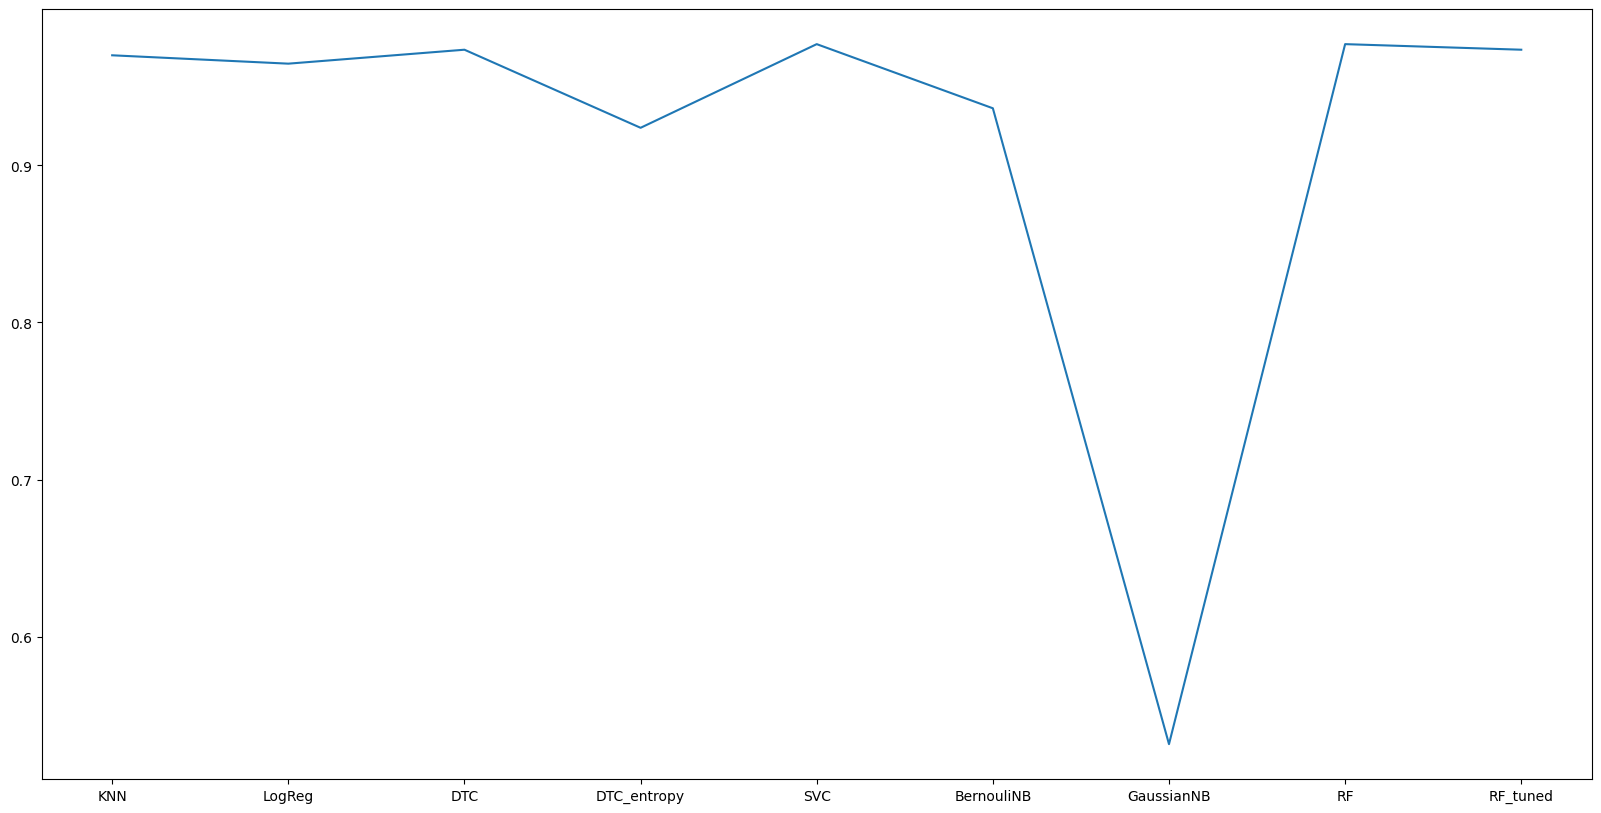

In [67]:
ax = plt.subplots(figsize=(20,10))
ax = plt.plot(model_name , model_acc)
ax

In [72]:
svc = SVC(C= 10, gamma='scale', kernel='rbf')

svc.fit(X_train, y_train)

y_pred=svc.predict(X_test)

cm = confusion_matrix(y_test , y_pred)

print("Confusion Matrix:")
print(cm,'\n')

print("F1 Score:", f1_score(y_test , y_pred ,average='weighted'),'\n')

print("Accuracy Score:", accuracy_score(y_test , y_pred),'\n')

print("Classification Report:")
print(classification_report(y_test , y_pred),'\n')


Confusion Matrix:
[[368   0   0   0]
 [  5   5   0   0]
 [  3   0   7   0]
 [  0   0   0  10]] 

F1 Score: 0.9772486722035225 

Accuracy Score: 0.9798994974874372 

Classification Report:
              precision    recall  f1-score   support

     Android       0.98      1.00      0.99       368
       Other       1.00      0.50      0.67        10
     Windows       1.00      0.70      0.82        10
         iOS       1.00      1.00      1.00        10

    accuracy                           0.98       398
   macro avg       0.99      0.80      0.87       398
weighted avg       0.98      0.98      0.98       398
 



## Dividing Battery Capacity

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
در این مرحله داده‌های ظرفیت باتری را بر اساس میانگین به سه دسته تقسیم کرده‌ایم 
</font>
</p>

In [85]:
X['battery_capacity'].min()

50.0

In [86]:
X['battery_capacity'].max()

11560.0

In [87]:
X['battery_capacity'].mean()

3385.437947944172

(array([ 52., 790., 743., 497., 394.,  75.,  56.,  22.,  16.,   6.]),
 array([   50.,  1201.,  2352.,  3503.,  4654.,  5805.,  6956.,  8107.,
         9258., 10409., 11560.]),
 <BarContainer object of 10 artists>)

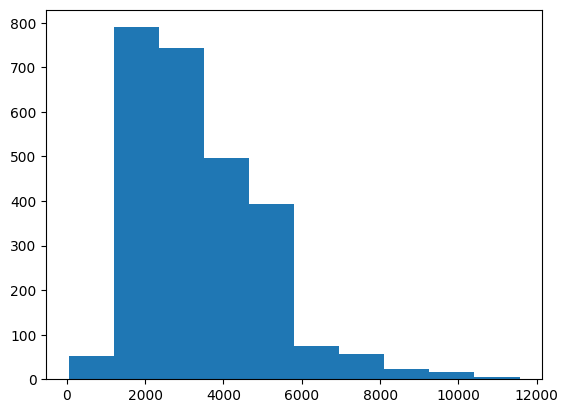

In [88]:
plt.hist(X['battery_capacity'])

In [96]:
def clustering(x):
    if  0<float(x)<3666:
        return 1800
    elif 3665<=float(x)<5000:
        return 4200
    elif 5000<=float(x)<12000: 
        return 8500

In [98]:
X['battery_capacity'] = X['battery_capacity'].apply(clustering)

In [100]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [101]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_val= scaler.transform(X_val)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
بهترین مدلی که در وضعیت قبل از تقسیم ستون ظرفیت باتری ترین کرده‌بودیم را مجددا روی داده تست اجرا می‌کنیم. نتایج نشان می‌دهد با وجود این تغییر در دسته‌بندی مقادیر ظرفیت باتری میزان دقت مدل تقریبا هیچ تغییری نکرده‌است
</font>
</p>

In [103]:
svc = SVC(C= 10, gamma='scale', kernel='rbf')

svc.fit(X_train, y_train)

y_pred=svc.predict(X_test)

cm = confusion_matrix(y_test , y_pred)

print("Confusion Matrix:")
print(cm,'\n')

print("F1 Score:", f1_score(y_test , y_pred ,average='weighted'),'\n')

print("Accuracy Score:", accuracy_score(y_test , y_pred),'\n')

print("Classification Report:")
print(classification_report(y_test , y_pred),'\n')

Confusion Matrix:
[[368   0   0   0]
 [  5   5   0   0]
 [  3   0   7   0]
 [  0   0   0  10]] 

F1 Score: 0.9772486722035225 

Accuracy Score: 0.9798994974874372 

Classification Report:
              precision    recall  f1-score   support

     Android       0.98      1.00      0.99       368
       Other       1.00      0.50      0.67        10
     Windows       1.00      0.70      0.82        10
         iOS       1.00      1.00      1.00        10

    accuracy                           0.98       398
   macro avg       0.99      0.80      0.87       398
weighted avg       0.98      0.98      0.98       398
 



## EXTRA

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5 color=blue> 
در این قسمت تصمیم گرفتیم ظرفیت باتری (ستون سه دسته‌ای) را بر اساس سایر ویژگی‌ها پیش‌بینی کنیم
</font>
</p>

## Preproseccing

In [115]:
data2=data.copy()

In [116]:
OS_name = pd.get_dummies(data2['OS'],prefix='OS')

data2 = pd.concat([data2,OS_name],axis=1).drop(['OS'],axis=1)

In [117]:
def clustering(x):
    if  0<float(x)<3666:
        return 1800
    elif 3665<=float(x)<5000:
        return 4200
    elif 5000<=float(x)<12000: 
        return 8500
data2['battery_capacity'] = data2['battery_capacity'].apply(clustering)    

In [118]:
X=data2.drop(['battery_capacity'],axis=1)
y = data2['battery_capacity']

In [119]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [120]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_val= scaler.transform(X_val)

In [121]:
model_name = []
model_acc = []

## KNN

In [122]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7,10,20], 'weights': ['uniform', 'distance']}

trainer = ModelTrainer(knn, param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_name.append("KNN")
model_acc.append(acc)

Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Cross Validation Scores: [0.76923077 0.79585799 0.80769231 0.79289941 0.74183976]
Mean Cross Validation Score: 0.7815040471968114
Training Set Scores in Each Fold:
[0.87551627 1.         0.84250927 1.         0.8201594  1.
 0.79085194 1.         0.75814047 1.        ]
validation Set Score: 0.8138297872340425
Confusion Matrix:
[[331  18  10]
 [ 29  57  17]
 [ 12  19  71]]
F1 Score: 0.8105276666761717
Accuracy Score: 0.8138297872340425
Classification Report:
              precision    recall  f1-score   support

        1800       0.89      0.92      0.91       359
        4200       0.61      0.55      0.58       103
        8500       0.72      0.70      0.71       102

    accuracy                           0.81       564
   macro avg       0.74      0.72      0.73       564
weighted avg       0.81      0.81      0.81       564



## LogisticRegression

In [123]:
LogReg = LogisticRegression()

trainer = ModelTrainer(LogReg)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("LogReg")

validation Set Score: 0.8209219858156028
Confusion Matrix:
[[337  14   8]
 [ 34  46  23]
 [ 12  10  80]]
F1 Score: 0.8111596014930295
Accuracy Score: 0.8209219858156028
Classification Report:
              precision    recall  f1-score   support

        1800       0.88      0.94      0.91       359
        4200       0.66      0.45      0.53       103
        8500       0.72      0.78      0.75       102

    accuracy                           0.82       564
   macro avg       0.75      0.72      0.73       564
weighted avg       0.81      0.82      0.81       564



C:\Users\HP\Documents\Quera\qenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [124]:
tree_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [None, 3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

trainer = ModelTrainer(tree_clf,param_grid)


acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("DTC")

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Cross Validation Scores: [0.80177515 0.78994083 0.84615385 0.82248521 0.79525223]
Mean Cross Validation Score: 0.8111214510210173
Training Set Scores in Each Fold:
[1.         0.9674369  0.93132    0.95085889 0.94464193 0.91770275
 0.90734061 0.90763668 0.90438006 0.78389501 0.78389501 0.78389501
 0.78389501 0.78389501 0.78389501 0.78389501 0.78389501 0.78389501
 0.84176941 0.84088151 0.83969753 0.84132562 0.84058565 0.8395496
 0.8379214  0.8379214  0.8379214  0.89476029 0.88972797 0.88158695
 0.88587908 0.88410305 0.8786264  0.87048494 0.87048494 0.8695967 ]
validation Set Score: 0.8031914893617021
Confusion Matrix:
[[334  19   6]
 [ 34  49  20]
 [ 11  21  70]]
F1 Score: 0.7972387203421519
Accuracy Score: 0.8031914893617021
Classification Report:
              precision    recall  f1-score   support

        1800       0.88      0.93      0.91       359
        4200       0.55      0.48      0.51       10

## SVC

In [125]:
svc = SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}

trainer = ModelTrainer(svc,param_grid)

acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("SVC")

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Cross Validation Scores: [0.80769231 0.83431953 0.83431953 0.81360947 0.79821958]
Mean Cross Validation Score: 0.8176320825944199
Training Set Scores in Each Fold:
[0.83540485 0.68250397 0.73889755 0.74052641 0.83540485 0.68043165
 0.73874951 0.73978644 0.84310066 0.81009366 0.84472876 0.75088659
 0.84310066 0.80269229 0.8441366  0.75133136 0.8441366  0.91933008
 0.93250408 0.70722257 0.8441366  0.91681376 0.93161585 0.70811113]
validation Set Score: 0.8280141843971631
Confusion Matrix:
[[329  24   6]
 [ 31  58  14]
 [  8  14  80]]
F1 Score: 0.8258144997776045
Accuracy Score: 0.8280141843971631
Classification Report:
              precision    recall  f1-score   support

        1800       0.89      0.92      0.91       359
        4200       0.60      0.56      0.58       103
        8500       0.80      0.78      0.79       102

    accuracy                           0.83       564
   macro avg       0.77      0.75      0.7

## Random Forest

In [126]:
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

trainer = ModelTrainer(rf,param_grid)
acc = trainer.train(X_train, y_train, X_val, y_val)

model_acc.append(acc)
model_name.append("RF")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Cross Validation Scores: [0.85502959 0.86686391 0.87869822 0.86390533 0.85756677]
Mean Cross Validation Score: 0.8644127613997508
Training Set Scores in Each Fold:
[1.         1.         1.         0.98164618 0.9828306  0.98208975
 0.94138464 0.94449356 0.94242091 0.95766669 0.95811036 0.95811113
 0.95367063 0.95367019 0.95100605 0.92865574 0.92421513 0.92643505
 0.90571284 0.90452864 0.90600903 0.90423256 0.90438093 0.90586077
 0.89875525 0.90067997 0.90112419 0.83644079 0.83451717 0.83185138
 0.83140956 0.83170334 0.83066762 0.8274122  0.8314077  0.82785609
 0.83037286 0.8336285  0.8325919  0.82504248 0.83125923 0.83066795
 0.82948419 0.82933505 0.82622778 0.82948342 0.82726306 0.82504336
 0.82696753 0.82430295 0.82578333 0.82711667 0.82297104 0.82489401
 0.96713984 0.97069254 0.96995279 0.94641729 0.94834179 0.94893362
 0.91962649 0.92021842 0.92243856 0.9327995  0.93220768 0.934

## Choosing the best model and fitting on the test data

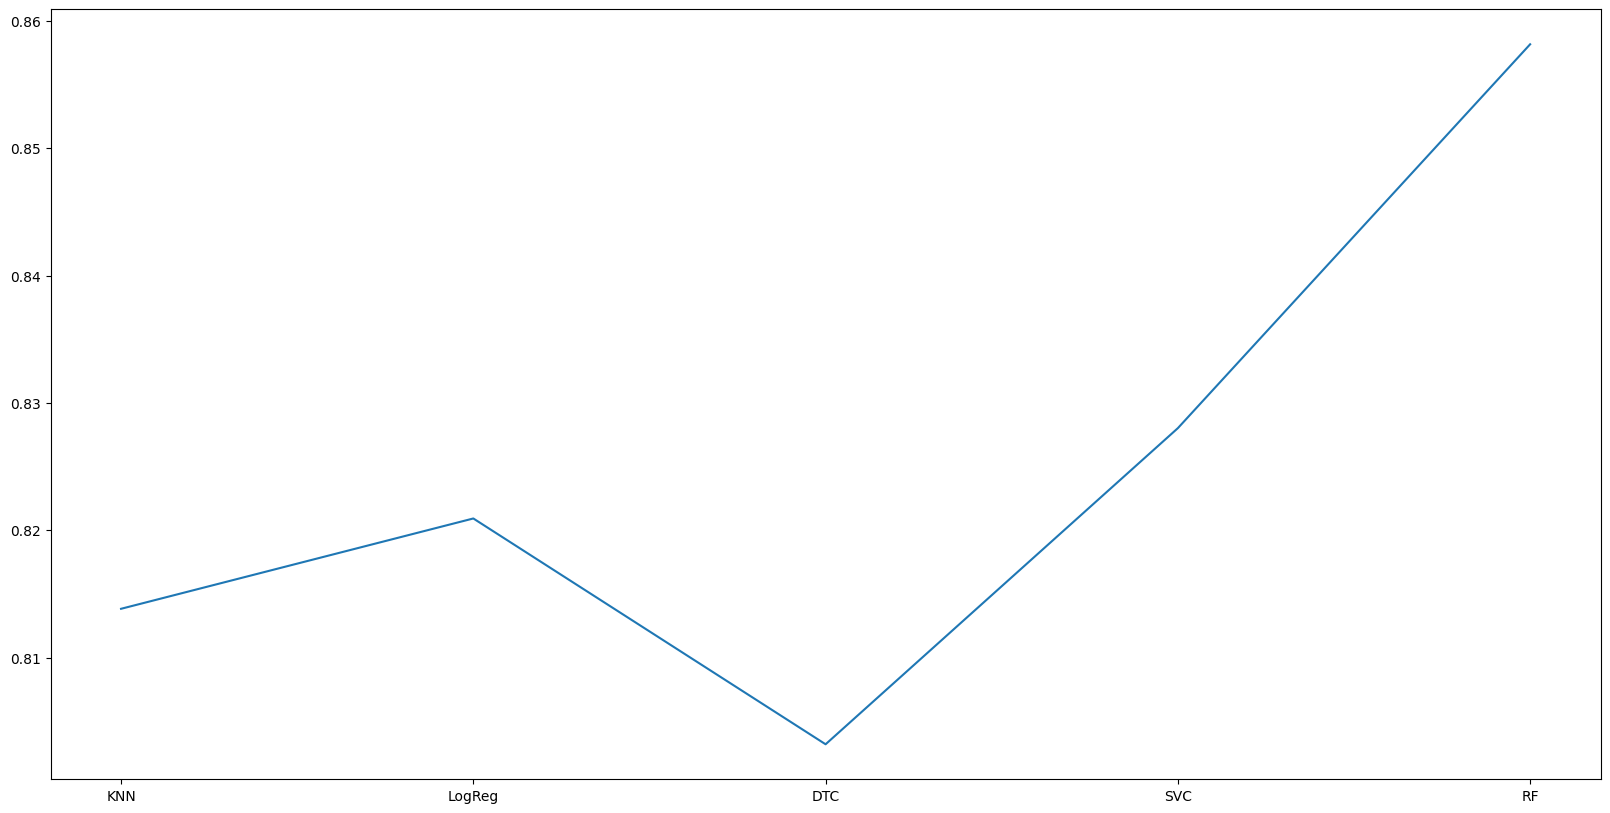

In [127]:
ax = plt.subplots(figsize=(20,10))
ax = plt.plot(model_name , model_acc)
ax

In [128]:
rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split= 2, n_estimators=300)

rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)

cm = confusion_matrix(y_test , y_pred)

print("Confusion Matrix:")
print(cm,'\n')

print("F1 Score:", f1_score(y_test , y_pred ,average='weighted'),'\n')

print("Accuracy Score:", accuracy_score(y_test , y_pred),'\n')

print("Classification Report:")
print(classification_report(y_test , y_pred),'\n')

Confusion Matrix:
[[244   6   2]
 [ 20  49   9]
 [  4   3  61]] 

F1 Score: 0.8843098816643009 

Accuracy Score: 0.8894472361809045 

Classification Report:
              precision    recall  f1-score   support

        1800       0.91      0.97      0.94       252
        4200       0.84      0.63      0.72        78
        8500       0.85      0.90      0.87        68

    accuracy                           0.89       398
   macro avg       0.87      0.83      0.84       398
weighted avg       0.89      0.89      0.88       398
 

